In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Convolution2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Define the model
classifier = Sequential()
classifier.add(Convolution2D(512, (3, 3), input_shape=(64, 64, 3), activation='relu', strides=(3, 3)))
classifier.add(MaxPooling2D(pool_size=(3, 3)))
classifier.add(Convolution2D(256, (2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(1, 1)))
classifier.add(Flatten())
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=2, activation='softmax'))

# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load datasets
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=12,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size=(64, 64),
                                            batch_size=12,
                                            class_mode='categorical')

Found 2229 images belonging to 2 classes.
Found 1496 images belonging to 2 classes.


In [26]:
# Train the model
history = classifier.fit(training_set,
                         steps_per_epoch=20,
                         epochs=100,
                         validation_data=test_set,
                         verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 9.8590e-04 - val_accuracy: 1.0000 - val_loss: 2.7386e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 883ms/step - accuracy: 1.0000 - loss: 2.7981e-04 - val_accuracy: 1.0000 - val_loss: 5.7088e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 844ms/step - accuracy: 1.0000 - loss: 3.6424e-04 - val_accuracy: 1.0000 - val_loss: 2.2601e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 867ms/step - accuracy: 1.0000 - loss: 1.3928e-04 - val_accuracy: 1.0000 - val_loss: 1.8345e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 745ms/step - accuracy: 1.0000 - loss: 9.3442e-05 - val_accuracy: 1.0000 - val_loss: 1.6887e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 681ms/step - accuracy: 1.0000 - loss: 4.9638e-04 - val_accuracy: 1.0000 - val_loss: 2.2367e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 629ms/step - accuracy: 1.0000 - loss: 2.5371e-04 - val_accuracy: 1.0000 - val_loss: 1.2772e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━

c:\Program Files\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 516ms/step - accuracy: 1.0000 - loss: 1.2968e-05 - val_accuracy: 1.0000 - val_loss: 1.2033e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 867ms/step - accuracy: 1.0000 - loss: 2.0175e-04 - val_accuracy: 1.0000 - val_loss: 2.4580e-04
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 854ms/step - accuracy: 1.0000 - loss: 1.1532e-04 - val_accuracy: 1.0000 - val_loss: 1.9059e-04
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 827ms/step - accuracy: 1.0000 - loss: 1.6520e-05 - val_accuracy: 1.0000 - val_loss: 1.7213e-04
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 800ms/step - accuracy: 1.0000 - loss: 1.6019e-05 - val_accuracy: 1.0000 - val_loss: 1.6962e-04
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 745ms/step - accuracy: 1.0000 - loss: 5.8609e-05 - val_accuracy: 1.0000 - val_loss: 1.2439e-04
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 665ms/step - accuracy: 0.9895 - loss: 0.0186 - val_accuracy: 0.9973 - val_loss: 0.0066
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 618m

In [27]:
# Save the model
classifier.save(r"CNN_1.h5")

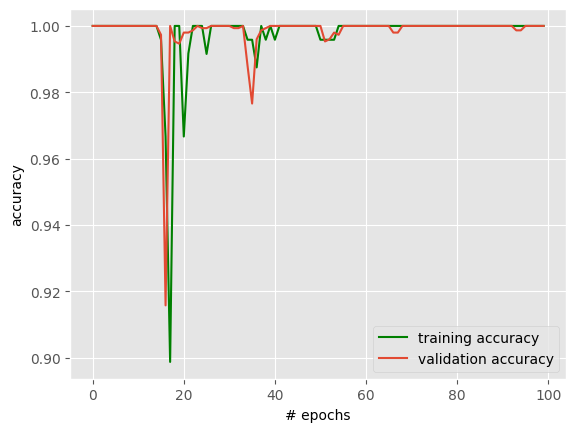

In [28]:

# Plot training results
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'], color='green', label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(r"CNN.png")
plt.show()

In [29]:
import numpy as np

# Make predictions on the test set
test_set.reset()  # Reset generator to ensure predictions are made on the correct images

# Calculate the number of steps as an integer
steps = int(np.ceil(test_set.samples / test_set.batch_size))

# Predict
predictions = classifier.predict(test_set, steps=steps)

# Get predicted labels and true labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_set.classes


125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step


In [30]:
# Classification report and confusion matrix
class_labels = list(test_set.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
conf_matrix = confusion_matrix(y_true, y_pred)

print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

deforestation       0.52      0.52      0.52       759
       forest       0.50      0.50      0.50       737

     accuracy                           0.51      1496
    macro avg       0.51      0.51      0.51      1496
 weighted avg       0.51      0.51      0.51      1496



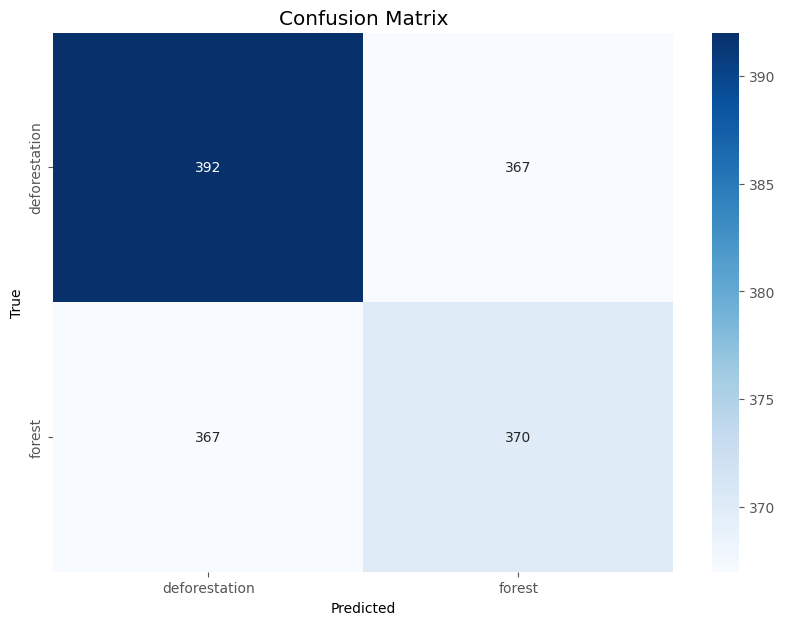

In [31]:




# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()
